<a href="https://colab.research.google.com/github/youve-been/sogang/blob/main/sem6/CSE4152/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코드 예시) Random 함수 


In [ ]:
import random

In [ ]:
#random.random() -> 0.0에서 1.0사이의 실수 중에서 난수값 리턴
print(random.random()) 
# ex) 0.2664520652284096

#random.uniform(a, b) -> 괄호 안 두 수 사이의 실수 중에서 난수값을 리턴
print(random.uniform(10, 30)) 
# ex) 28.038707445386397

#random.randint(a, b) -> 괄호 안 두 수 사이의 정수 중에서 난수값을 리턴
print(random.randint(100,200))
# ex) 106

#random.choice(sample) 함수 -> sample에서 무작위로 하나를 선택하여 리턴
data = [1, 2, 3, 4, 5, 6, 7]
print(random.choice(data))
# ex) 5

#random.sample(sample, n) -> 입력으로 받은 sample 에서 정한 개수만큼  무작위로 뽑아 리턴함
data = [1, 2, 3, 4, 'apple', 'banna']
print(random.sample(data, 3))
# ex) ['apple', 2, 3]
print(random.sample(data, 3))
# ex) ['apple', 3, 'banna']
print(random.sample(data, 5))
# ex) [2, 3, 1, 'apple', 4]

0.744367907573314
27.39245246175793
139
6
[3, 'apple', 4]
[1, 4, 3]
[4, 'banna', 'apple', 3, 2]


# 실습1. 난수 히스토그램 그리기 (Python Random module)


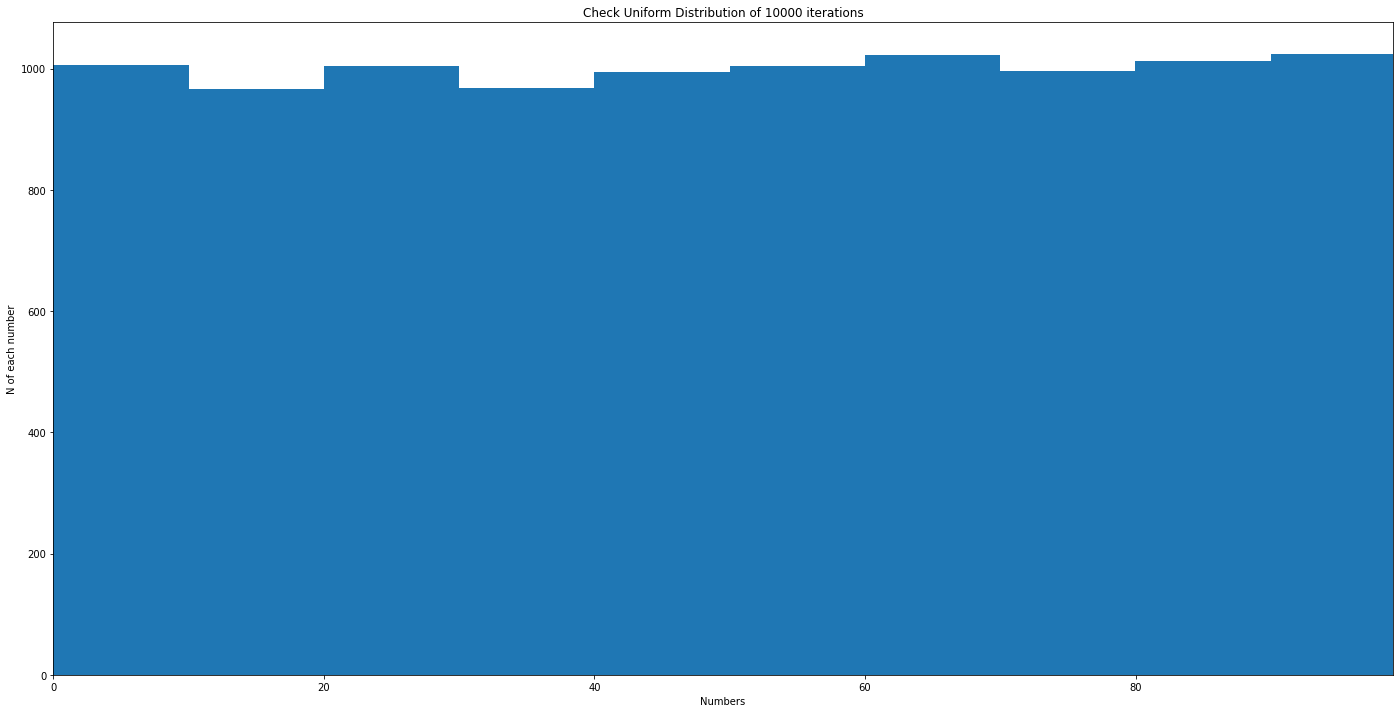

In [ ]:
# answer code

import matplotlib.pyplot as plt
from tqdm import tqdm # optional
import random

num_iterations = 10000
random_integers = []

for i in range(0, num_iterations) :
  random_integers.append(random.uniform(0, 100))


fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 99])
plt.show()

# 실습 2. Linear Congruential Generator(LCG) 구현  

Linear Congruential Generator(LCG) 구현  

X_(n+1) = (aX_n+C) mod m

LCG는 다음과 같은 인자들로 유일하게 결정됨  
  - 0 < m, 0 < a < m, 0 <= c < m, 0<=초기값 < m  

최대 주기 m을 가지기 위한 필요충분조건  

  - c와 m이 서로소, a-1이 m의 모든 소인수로 나뉨 
  - m이 4의 배수면 a-1도 4의 배수

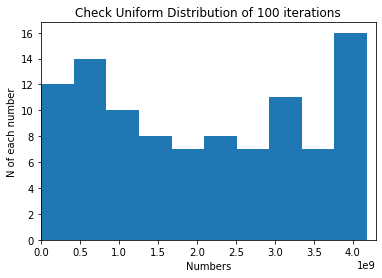

In [ ]:
# answer code

def lcg(seed, loop, m=2**32, a=214013, c=2531011):
    for i in range(loop):
        seed = (a*seed+c) % m
        yield seed

num_iterations = 100
random_generator = lcg(seed=13, loop=num_iterations, m=2**32)
random_integers = []

for i in random_generator :
    random_integers.append(i)

fig = plt.figure()
plt.hist(random_integers)
plt.title(f"Check Uniform Distribution of {num_iterations} iterations")
plt.xlabel("Numbers")
plt.ylabel("N of each number")
plt.xlim([0, 2**32])
plt.show()

# 실습 3. 주사위 합이 8인 경우

In [ ]:
# answer code

!pip install termcolor
from termcolor import colored
!pip install colorama
from colorama import init, Fore, Back, Style
import random

def roll_dice():
    return (random.randint(1, 6), random.randint(1, 6))

dice_tries = []
num_iterations = 100
hits = 0

for _ in range(num_iterations):
    dice_tries.append(roll_dice())

print("="*100)
print(colored("* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *", 'red'))

for i in range(num_iterations):
    dicesum = dice_tries[i][0] + dice_tries[i][1]
    if dicesum == 8 :
        print(Fore.YELLOW + Back.CYAN + "try %2d : %d %d" % (i, dice_tries[i][0], dice_tries[i][1]) + Style.RESET_ALL, end = " ")
        hits += 1
    else :
        print("try %2d : %d %d" % (i, dice_tries[i][0], dice_tries[i][1]), end=" ")
    if i % 5 == 4 :
        print()


print(colored("\n실제 값 : 0.138889", "red"))
print(colored(f"계산된 값 : {round(hits / num_iterations,6)}", "red"))
print(colored(f"오차율 : {abs(hits / num_iterations - 5/36) / (5/36) * 100} %", "red"))
print("="*100)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
* 두 주사위의 합이 8인 경우에는 cyan 색의 음영이 들어가 있음 *
try  0 : 2 2 try  1 : 2 6 try  2 : 2 6 try  3 : 1 6 try  4 : 2 4 
try  5 : 4 5 try  6 : 3 5 try  7 : 1 6 try  8 : 6 5 try  9 : 5 1 
try 10 : 6 1 try 11 : 3 4 try 12 : 1 5 try 13 : 5 5 try 14 : 5 3 
try 15 : 6 4 try 16 : 6 5 try 17 : 4 5 try 18 : 2 5 try 19 : 3 1 
try 20 : 4 6 try 21 : 3 3 try 22 : 6 2 try 23 : 5 3 try 24 : 6 1 
try 25 : 2 2 try 26 : 1 1 try 27 : 6 5 try 28 : 4 1 try 29 : 6 5 
try 30 : 5 3 try 31 : 3 3 try 32 : 6 1 try 33 : 1 3 try 34 : 3 2 
try 35 : 5 3 try 36 : 3 5 try 37 : 4 1 try 38 : 2 3 try 39 : 3 6 
try 40 : 3 3 try 41 : 6 4 try 42 : 2 4 try 43 : 3 5 try 44 : 2 5 
try 45 : 2 1 try 46 : 5 1 try 47 : 6 5 try 48 : 6 6 try 49 : 1 5 
try 50 : 2 3 try 51 : 6 1 try 52 : 6 4 try 53 : 2 5 try 54 : 2 1 
try 55 : 1 3 try 56 : 2 2 try 57 : 

# 실습 4. 주사위 게임

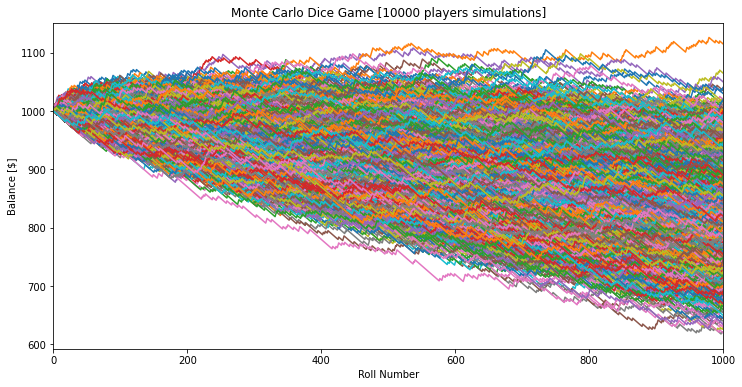

10000명 플레이어의 1000번 수행 횟수 시 평균 승률  :  0.17
10000명 플레이어의 1000번 수행 횟수 시 평균 잔액  : $832.09


In [ ]:
# answer code

def roll_dice():
    return (random.randint(1, 6), random.randint(1, 6))

# Inputs
num_simulations = 10000
max_num_rolls = 1000

win_probability = []
end_balance = []

plt.figure(figsize=(12,6))
for i in range(num_simulations):
    win = 0
    bal = 1000
    ballist = [1000]
    for _ in range(max_num_rolls) :
        dice = roll_dice()
        if dice[0] == dice[1] :
            win += 1
            bal += 4
        else :
            bal -= 1
        ballist.append(bal)
    plt.plot(ballist)
    end_balance.append(bal)
    win_probability.append(win/max_num_rolls)

plt.title("Monte Carlo Dice Game [" + str(num_simulations) + " players simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])
plt.show()

overall_win_probability = sum(win_probability)/num_simulations
overall_end_balance = sum(end_balance)/num_simulations

print(f"{num_simulations}명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 승률" + "  :  " + colored(f"{overall_win_probability:.2f}","red"))
print(f"{num_simulations}명 플레이어의 {max_num_rolls}번 수행 횟수 시 평균 잔액 "  + f" : {colored('$','red')}" + colored(f"{overall_end_balance:.2f}","red"))

# 실습 5. 원주율 구하기

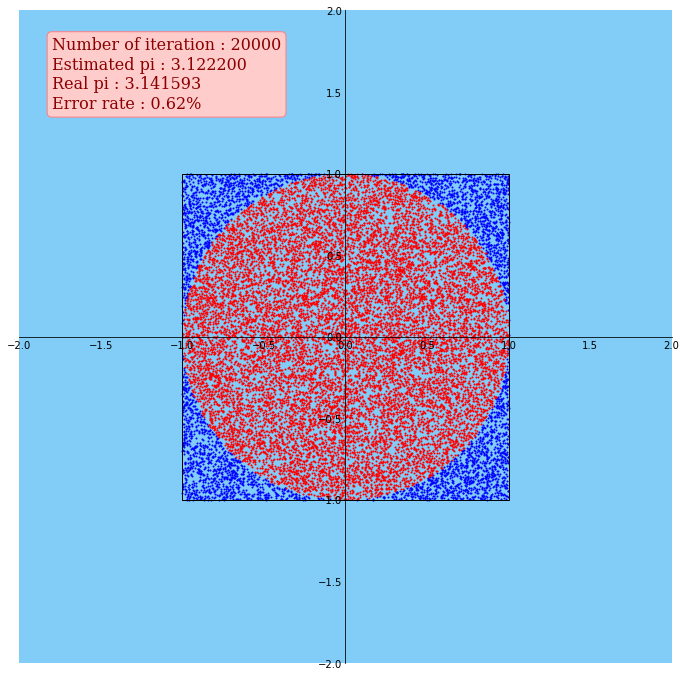

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

MAX_POINTS = 20000
x_in = []
y_in = []
x_out = []
y_out = []

for _ in range(MAX_POINTS) :
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    if np.sqrt(x**2 + y**2) <= 1 :
        x_in.append(x)
        y_in.append(y)
        pi += 1
    else :
        x_out.append(x)
        y_out.append(y)

pi = pi / MAX_POINTS * 4

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])
for x, y in zip(x_out, y_out) :
    ax.scatter(x, y, s = 1, c = 'blue')
for x, y in zip(x_in, y_in) :
    ax.scatter(x, y, s = 1, c = 'red')

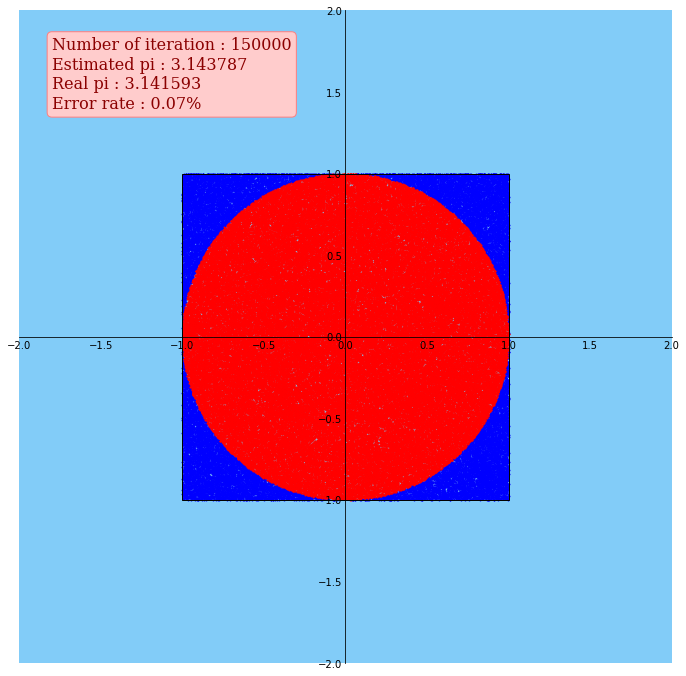

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

pi = 0

MAX_POINTS = 150000
x_in = []
y_in = []
x_out = []
y_out = []

for _ in range(MAX_POINTS) :
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    if np.sqrt(x**2 + y**2) <= 1 :
        x_in.append(x)
        y_in.append(y)
        pi += 1
    else :
        x_out.append(x)
        y_out.append(y)

pi = pi / MAX_POINTS * 4

plt.rcParams['figure.figsize'] = (24, 12)
font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 16}
box1 = {'boxstyle': 'round',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8)}

fig, ax = plt.subplots(1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params('both', length=0)    
ax.set_aspect('equal')
ax.text(-1.8,1.4, f"Number of iteration : {MAX_POINTS}\nEstimated pi : {pi:.6f}\nReal pi : 3.141593\nError rate : {abs(pi-3.141593)/3.141593*100:.2f}%", fontdict=font1, bbox=box1)
ax.patch.set_facecolor('#069af3') ## axes 배경색
ax.patch.set_alpha(0.5) ## axes 투명도
ax.add_patch(
   patches.Rectangle(
      (-1, -1),                   # (x, y)
      2, 2,                     # width, height
      edgecolor = 'black',
      facecolor = 'lightgray',
      fill=False,
   ))
plt.xlim([-2,2])
plt.ylim([-2,2])
for x, y in zip(x_out, y_out) :
    ax.scatter(x, y, s = 1, c = 'blue')
for x, y in zip(x_in, y_in) :
    ax.scatter(x, y, s = 1, c = 'red')

# 실습 6. 계약 손익 예측

6억원 이하의 매출을 얻을 확률 : 64.48
6억원 초과의 매출을 얻을 확률 : 35.52


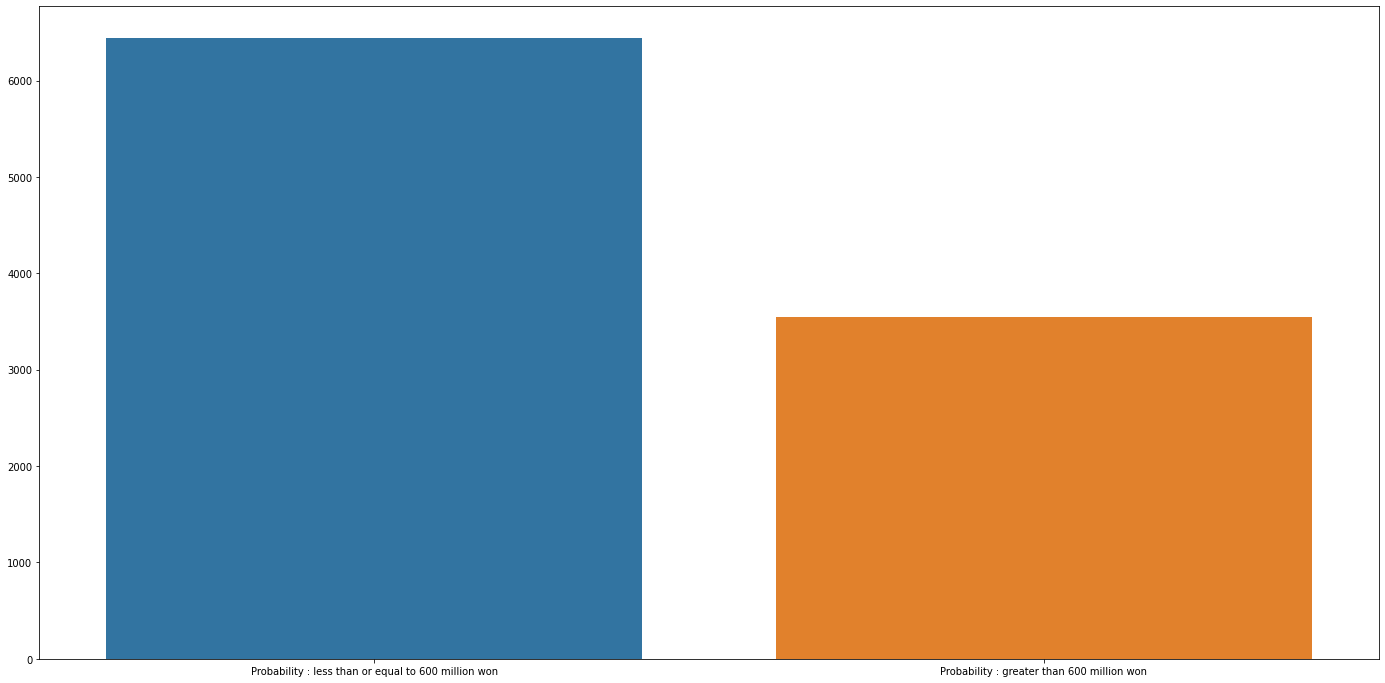

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 시뮬레이션 횟수
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    sales = random.triangular(1, 9, 3)
    nobel = random.randint(0, 1)
    if nobel == 1 :
         sales *= random.triangular(1.25, 1.75, 1.5)
    results.append(sales)


binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Probability : less than or equal to 600 million won",
    "Probability : greater than 600 million won"])

# 결과물 시각화
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)

C1 , C2 = binned_results.value_counts()
P1 = round(C1 / N_ROUNDS * 100, 2)
P2 = round(C2 / N_ROUNDS * 100, 2)

print("6억원 이하의 매출을 얻을 확률 :", colored(f"{P1}","red") )
print("6억원 초과의 매출을 얻을 확률 :", colored(f"{P2}","blue"))

# 실습 7 헬스장 수익 예측


하위 1%의 수익 :  9.2175 억
매년 준비해야할 금액 :  2.1825 억


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


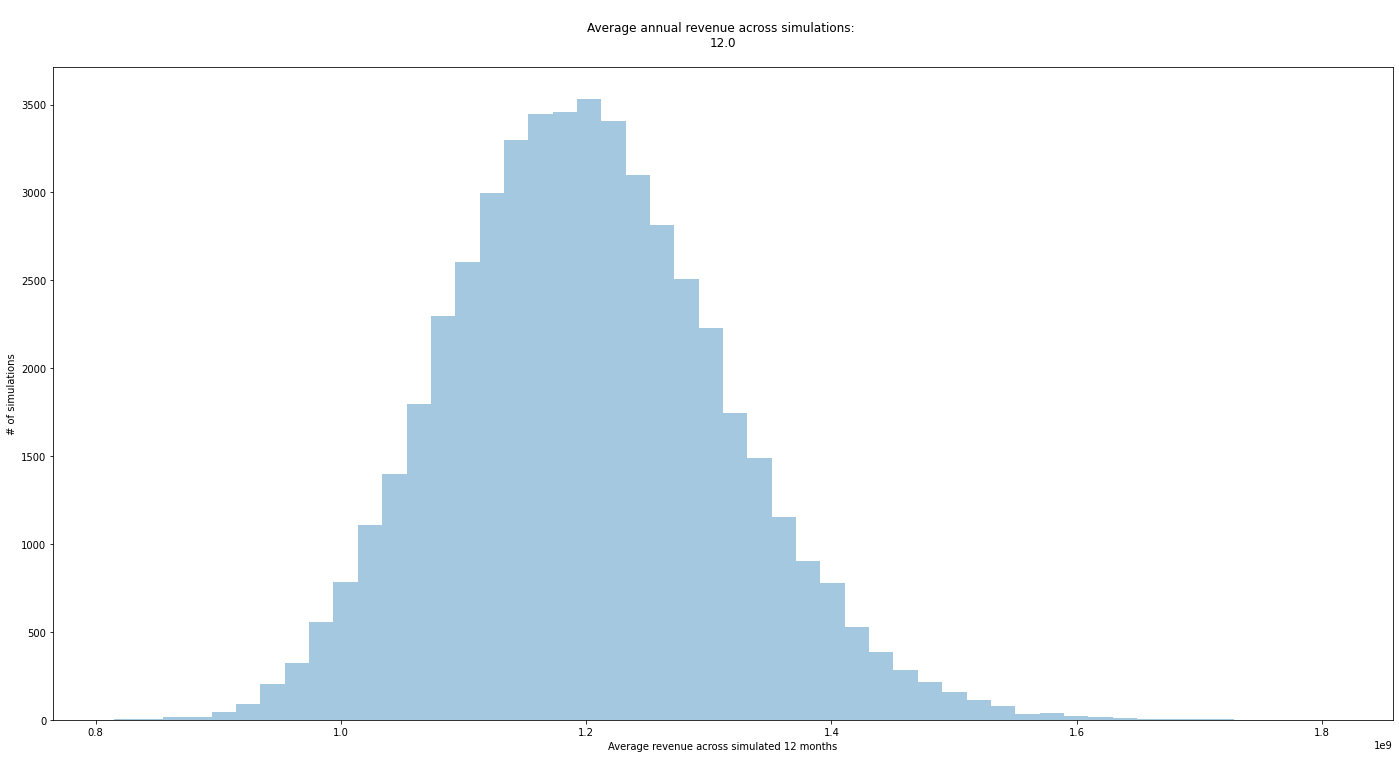

In [ ]:
import numpy as np
import seaborn as sns
from termcolor import colored

np.random.seed(1)

N_ROUNDS = 10000
price = 50000
results = []
for rnd in range(N_ROUNDS):
    for _ in range(5) :
        cus = 2000
        rev = 0
        for t in range(12) :
            rev += cus * price
            cus = (1 + np.random.normal(0, 0.05)) * cus
        results.append(rev)


print("하위 1%의 수익 : ", colored(f"{sorted(results)[100] / 1e8:.4f} 억","red"))
lower_revenue = sorted(results)[100]
print(f"매년 준비해야할 금액 : ",  colored(f"{(12*9.5*1e7 - lower_revenue)/1e8:.4f} 억","red"))

ax = sns.distplot(results, kde=False)
ax.set_xlabel("Average revenue across simulated 12 months")
ax.set_ylabel("# of simulations")
plt.title(f"""
Average annual revenue across simulations: 
{round(np.mean(results)/1e8, 2)}
""")
plt.show()